In [6]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from ForestCoverDataset import ForestCoverDataset
from models.unet.model import *
from helper import *
from torch import nn
from tqdm import tqdm
import torchmetrics
from utils import *
import matplotlib.pyplot as plt

In [58]:
train_dataset = ForestCoverDataset(mode='train', one_hot_masks=True)
val_dataset = ForestCoverDataset(mode='val', one_hot_masks=True)

# Setup device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Load the model
model = UNet_tiny(num_classes=2).to(device)

from glob import glob
latest_model = max(glob('model_*.pth'))
model.load_state_dict(torch.load(latest_model))
# model.eval()

# Run the model on a sample image from the training set
# image, mask = val_dataset[20]
image, mask = val_dataset[40]
image, mask = torch.tensor(image, device=device).unsqueeze(0), torch.tensor(mask, device=device).unsqueeze(0)
output = model(image)
print(output.shape)
print(mask.shape)
print(image.shape)
print(mask.squeeze().shape)

torch.Size([1, 2, 512, 512])
torch.Size([1, 2, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([2, 512, 512])


(-0.5, 511.5, 511.5, -0.5)

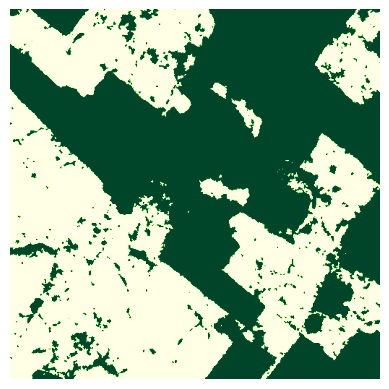

In [59]:
plt.imshow(reverse_one_hot(np.array(mask.squeeze().to('cpu')).transpose(1, 2, 0)), cmap='YlGn')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

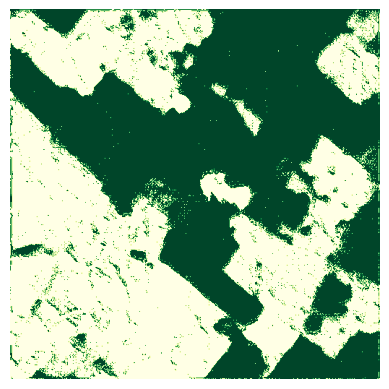

In [60]:
out = output.detach().cpu().numpy().squeeze()
plt.imshow(reverse_one_hot(out.transpose(1, 2, 0)), cmap='YlGn')
plt.axis('off')

In [63]:
our_label = reverse_one_hot(np.array(mask.squeeze().to('cpu')).transpose(1, 2, 0))
our_pred = reverse_one_hot(out.transpose(1, 2, 0)) > 0.5
# acc
acc = (our_label == our_pred).mean()
print(f'Accuracy: {acc}')
# f1
metric_f1 = torchmetrics.classification.BinaryF1Score().to(device)
metric_f1(output, mask)
f1_score = metric_f1.compute()
print(f'F1 Score: {f1_score}')
metric_iou = torchmetrics.classification.BinaryJaccardIndex().to(device)
metric_iou(output, mask)
iou_score = metric_iou.compute()
print(f'IoU Score: {iou_score}')

Accuracy: 0.9202384948730469
F1 Score: 0.7627688646316528
IoU Score: 0.6165128350257874


(3, 512, 512)


(-0.5, 511.5, 511.5, -0.5)

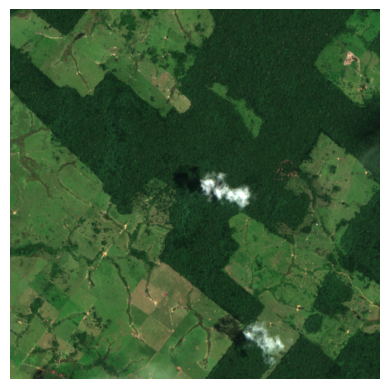

In [62]:
img = image.detach().cpu().numpy().squeeze()
print(img.shape)
plt.imshow(img.transpose(1, 2, 0))
plt.axis('off')